In [1]:
# 基本パッケージ（numpy,Pandas,matplotlib,Seaborn）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
# LightGBM
import lightgbm as lgb
# XGboost
import xgboost as xgb
# train_test_split（データを分割出してくれる）
from sklearn.model_selection import train_test_split
# accuracy_score（正解率を測れる）
from sklearn.metrics import accuracy_score
# グリッドサーチ（ハイパーパラメータを自動的に最適化してくれる）
from sklearn.model_selection import GridSearchCV
# 正規化、標準化用
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 特徴量選択用
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
# 交差検証用
from sklearn.model_selection import cross_val_score
# 多項式特徴量生成用
from sklearn.preprocessing import PolynomialFeatures
# モデルの保存
from sklearn.externals import joblib

D:\Program\Anaconda3\envs\sklearn1.9.1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 表示関連
# DataFrameの列数設定
pd.set_option('display.max_columns', 500)

In [3]:
# 株価データの読み込み
stock_data = pd.read_csv("stock_Price_Prediction_v4.csv", encoding="shift-jis")

# 読み込みデータの表示
stock_data.head()

Open      High       Low    Volume  Adj Close     ema_5      macd  \
0  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1 -0.006250  0.024889 -0.003604  2.643314   0.018700  0.006350  0.962815   
2  0.026954  0.004337  0.028933  0.208818   0.000874  0.004502  0.300991   
3  0.000000 -0.011226 -0.002636 -0.317789  -0.003493  0.001813  0.040578   
4 -0.004374  0.001747 -0.003524 -0.435145  -0.002629  0.000327 -0.056532   

   Open000001.SS  High000001.SS  Low000001.SS  Adj Close000001.SS  Open^AORD  \
0       0.000000       0.000000      0.000000            0.000000   0.000000   
1      -0.016024      -0.004302      0.004251            0.007344  -0.007255   
2       0.007755       0.024780      0.000608            0.029596  -0.002965   
3       0.034787       0.008247      0.028360           -0.004298  -0.001832   
4      -0.010102      -0.008097      0.001548            0.003675   0.005206   

   High^AORD  Low^AORD  Adj Close^AORD  Open^AXJO  High^AXJO  Low^AXJO  \
0   0.000000  0.000000        0.000000   0.000000   0.000000  0.000000   
1  -0.006006 -0.001020       -0.002846  -0.008053  -0.007226 -0.000710   
2  -0.004128 -0.003605       -0.001832  -0.002805  -0.004479 -0.003582   
3   0.004866  0.001598        0.005206  -0.001539   0.005240  0.001783   
4   0.002003  0.003281        0.000030   0.005159   0.001914  0.002996   

   Adj Close^AXJO  Open^BFX  High^BFX   Low^BFX  Adj Close^BFX  Open^BSESN  \
0        0.000000  0.000000  0.000000  0.000000       0.000000    0.000000   
1       -0.002805 -0.004067  0.006438  0.002904       0.010276   -0.001324   
2       -0.001539  0.007597  0.008347  0.009030       0.007857   -0.010703   
3        0.005159  0.008674 -0.000677 -0.002430      -0.012138    0.015344   
4       -0.000295 -0.008389 -0.010180 -0.008107      -0.006618   -0.004078   

   High^BSESN  Low^BSESN  Adj Close^BSESN  Open^BVSP  High^BVSP  Low^BVSP  \
0    0.000000   0.000000         0.000000   0.000000   0.000000  0.000000   
1   -0.010327  -0.009173        -0.012208  -0.014983  -0.014038 -0.013892   
2    0.008073   0.001284         0.014311  -0.014307   0.001873 -0.001531   
3    0.002683   0.010328        -0.003411   0.020779   0.005610  0.014723   
4   -0.004827  -0.005753        -0.005828  -0.008532  -0.014652 -0.008993   

   Adj Close^BVSP  Open^DJI  High^DJI   Low^DJI  Adj Close^DJI  Open^FCHI  \
0        0.000000  0.000000  0.000000  0.000000       0.000000   0.000000   
1       -0.012080 -0.003927 -0.001217 -0.012214      -0.011191  -0.011637   
2        0.021016 -0.010887 -0.007542  0.001753       0.003616  -0.002981   
3       -0.006287  0.003555  0.007155  0.005920       0.003563  -0.014871   
4       -0.008738  0.002258 -0.007391 -0.009447      -0.002196  -0.007102   

   High^FCHI  Low^FCHI  Adj Close^FCHI  Open^GDAXI  High^GDAXI  Low^GDAXI  \
0   0.000000  0.000000        0.000000    0.000000    0.000000   0.000000   
1  -0.009375 -0.009456        0.001065   -0.016036   -0.010612  -0.004488   
2  -0.004875 -0.010073       -0.020282   -0.001732   -0.006093  -0.010315   
3  -0.014456 -0.006542       -0.004982   -0.006381    0.000597   0.004482   
4  -0.009416 -0.020218       -0.018562    0.002074   -0.006028  -0.020454   

   Adj Close^GDAXI  Open^GSPC   High^GSPC   Low^GSPC   Adj Close^GSPC   \
0         0.000000    0.000000    0.000000   0.000000         0.000000   
1        -0.005506   -0.008530   -0.006707  -0.014114        -0.009993   
2        -0.005091   -0.009993   -0.007376   0.000339         0.000835   
3         0.001062    0.000835    0.002530  -0.000509        -0.003205   
4        -0.015246   -0.003205   -0.006971  -0.006878         0.002280   

   Open^GSPTSE  High^GSPTSE  Low^GSPTSE  Adj Close^GSPTSE  Open^HSI  High^HSI  \
0     0.000000     0.000000    0.000000          0.000000  0.000000  0.000000   
1    -0.003407    -0.004167   -0.006936         -0.006474 -0.018231 -0.018280   
2    -0.004867    -0.003182   -0.007444         -0.007370 -0.005971 -0.001443 

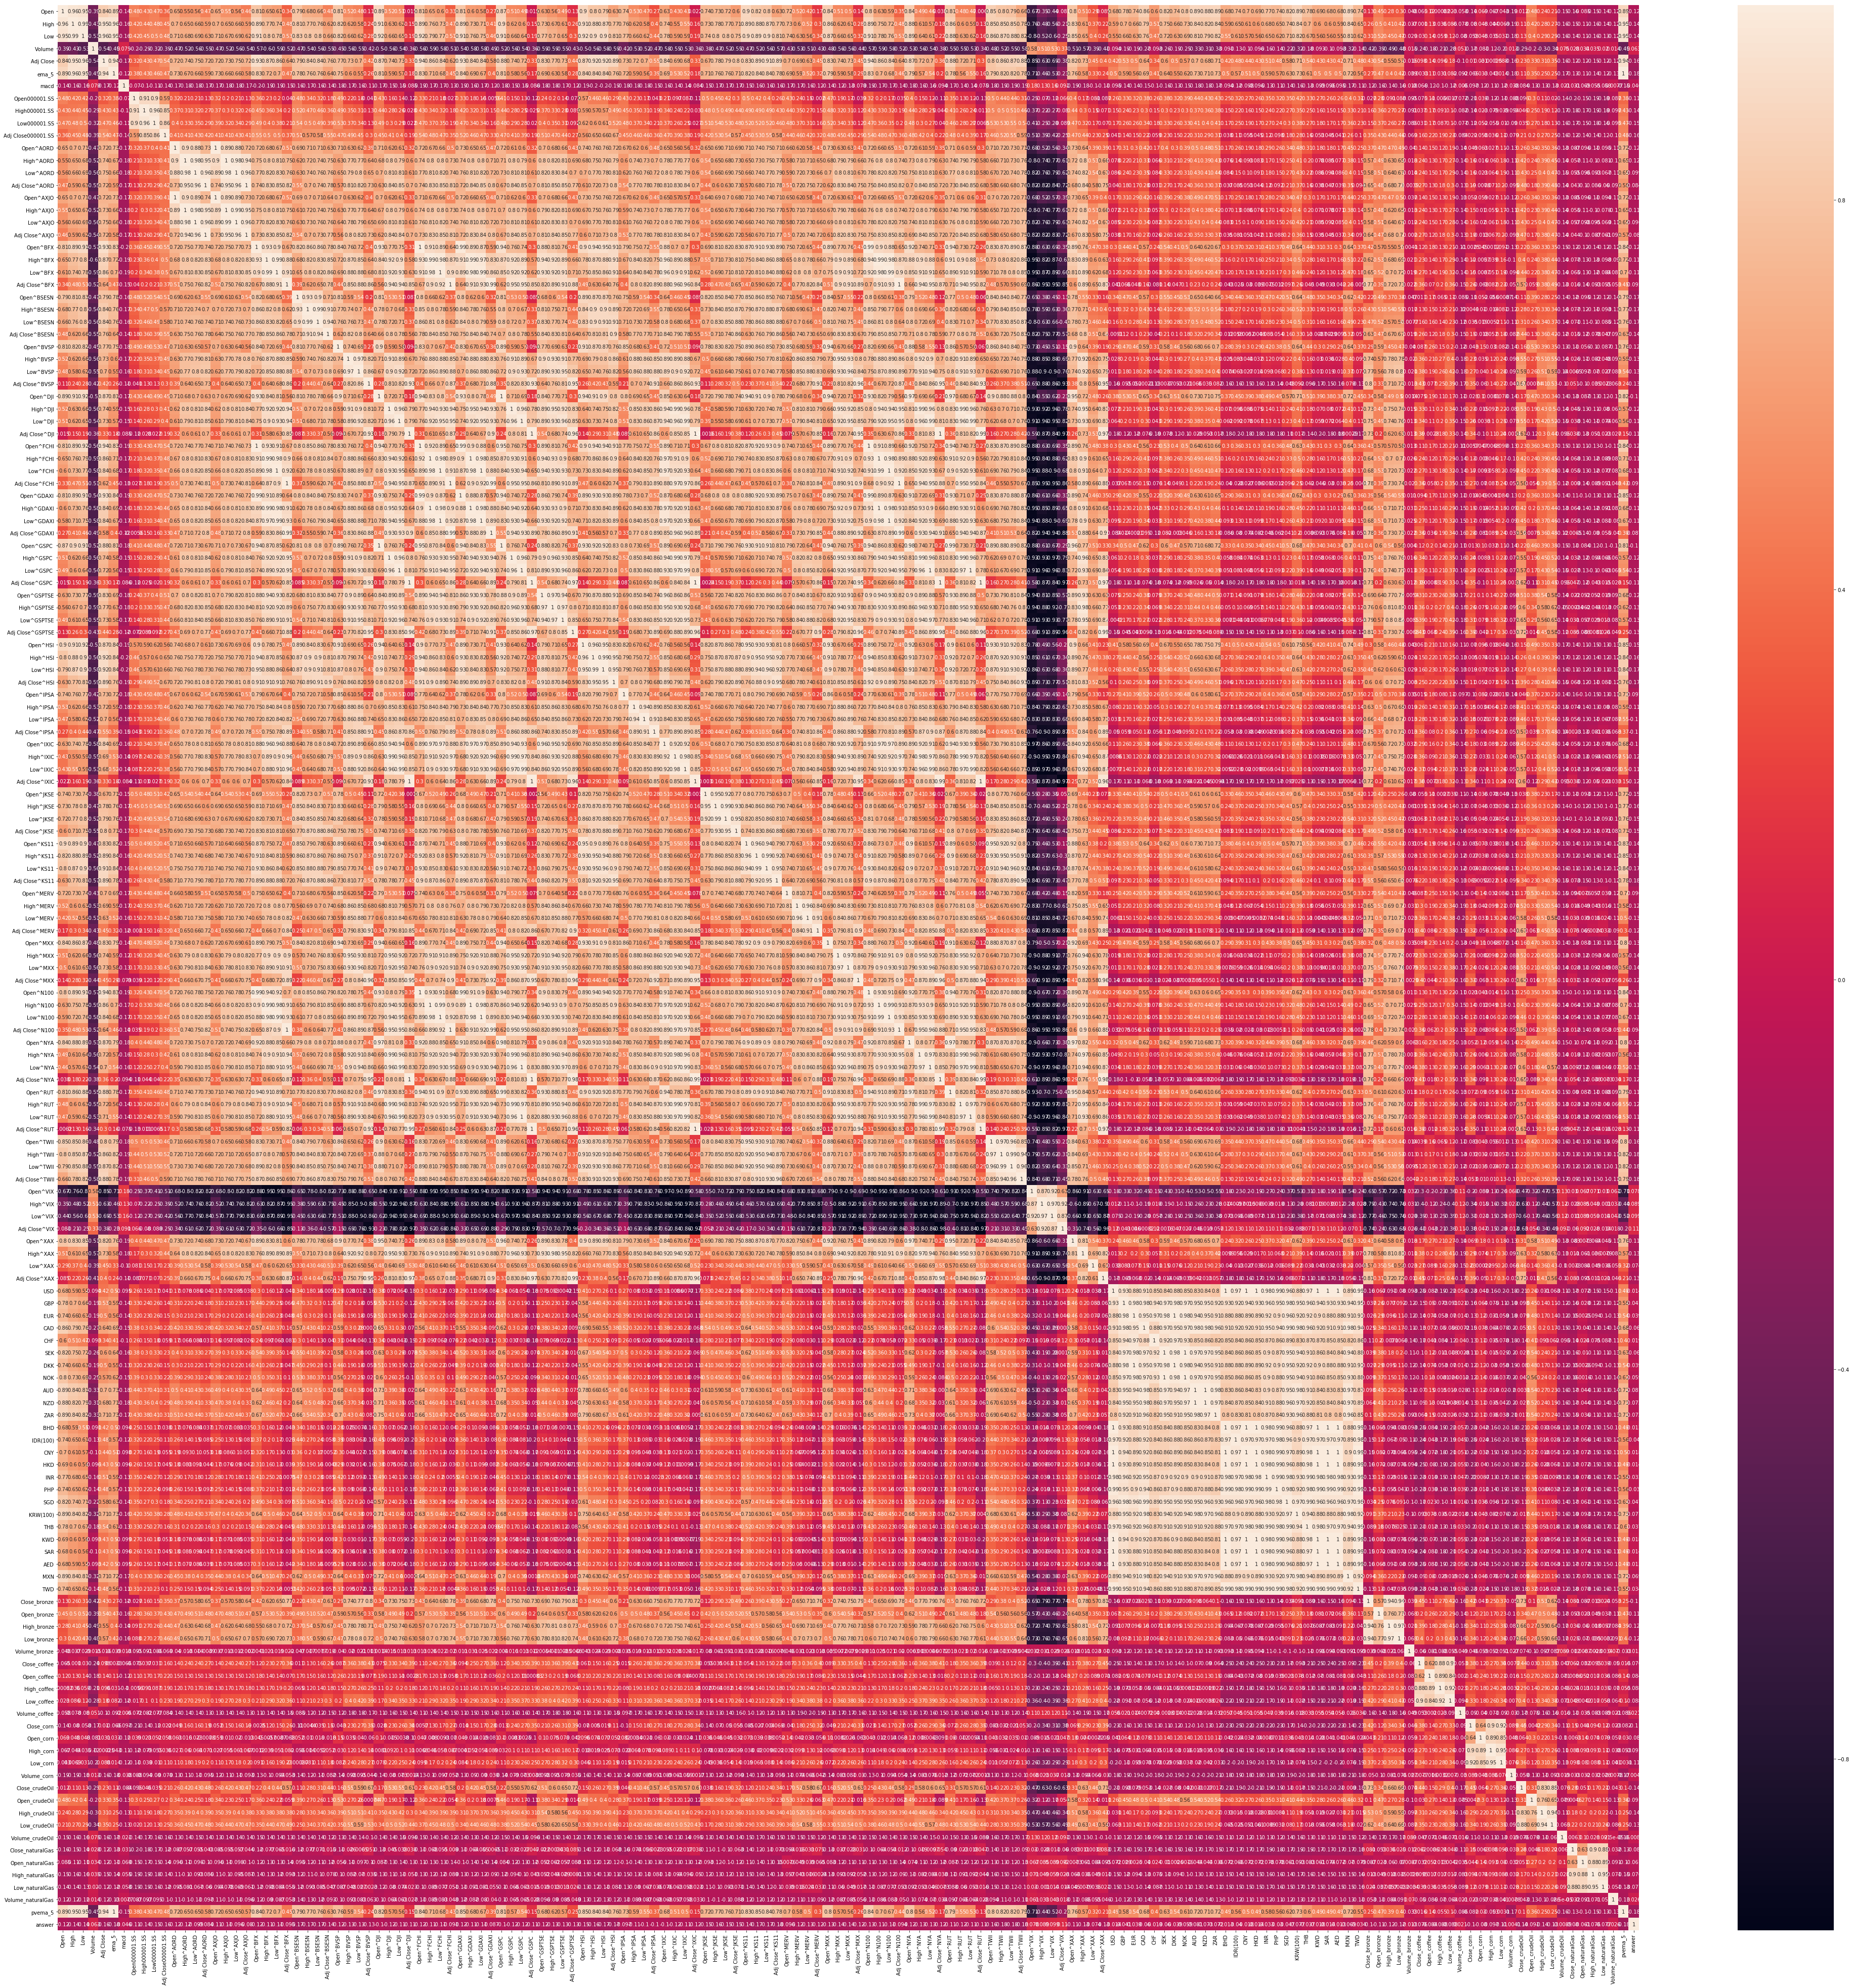

In [4]:
# 相関係数の出力
correlation_coefficient = stock_data.corr()
f, ax = plt.subplots(figsize=(70, 70))
sns.heatmap(correlation_coefficient.corr(),annot=True)
plt.show()
## CSVへ出力
correlation_coefficient.to_csv('correlation_coefficient_3.3.csv')

In [5]:
# 目的変数の変換
answers = stock_data['answer']
# 目的変数を削除
stock_data.drop(columns=['answer'], inplace=True)

In [6]:
# ランダムフォレストによる学習
rf =  RandomForestClassifier(random_state=1)
rf.fit(stock_data, answers)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

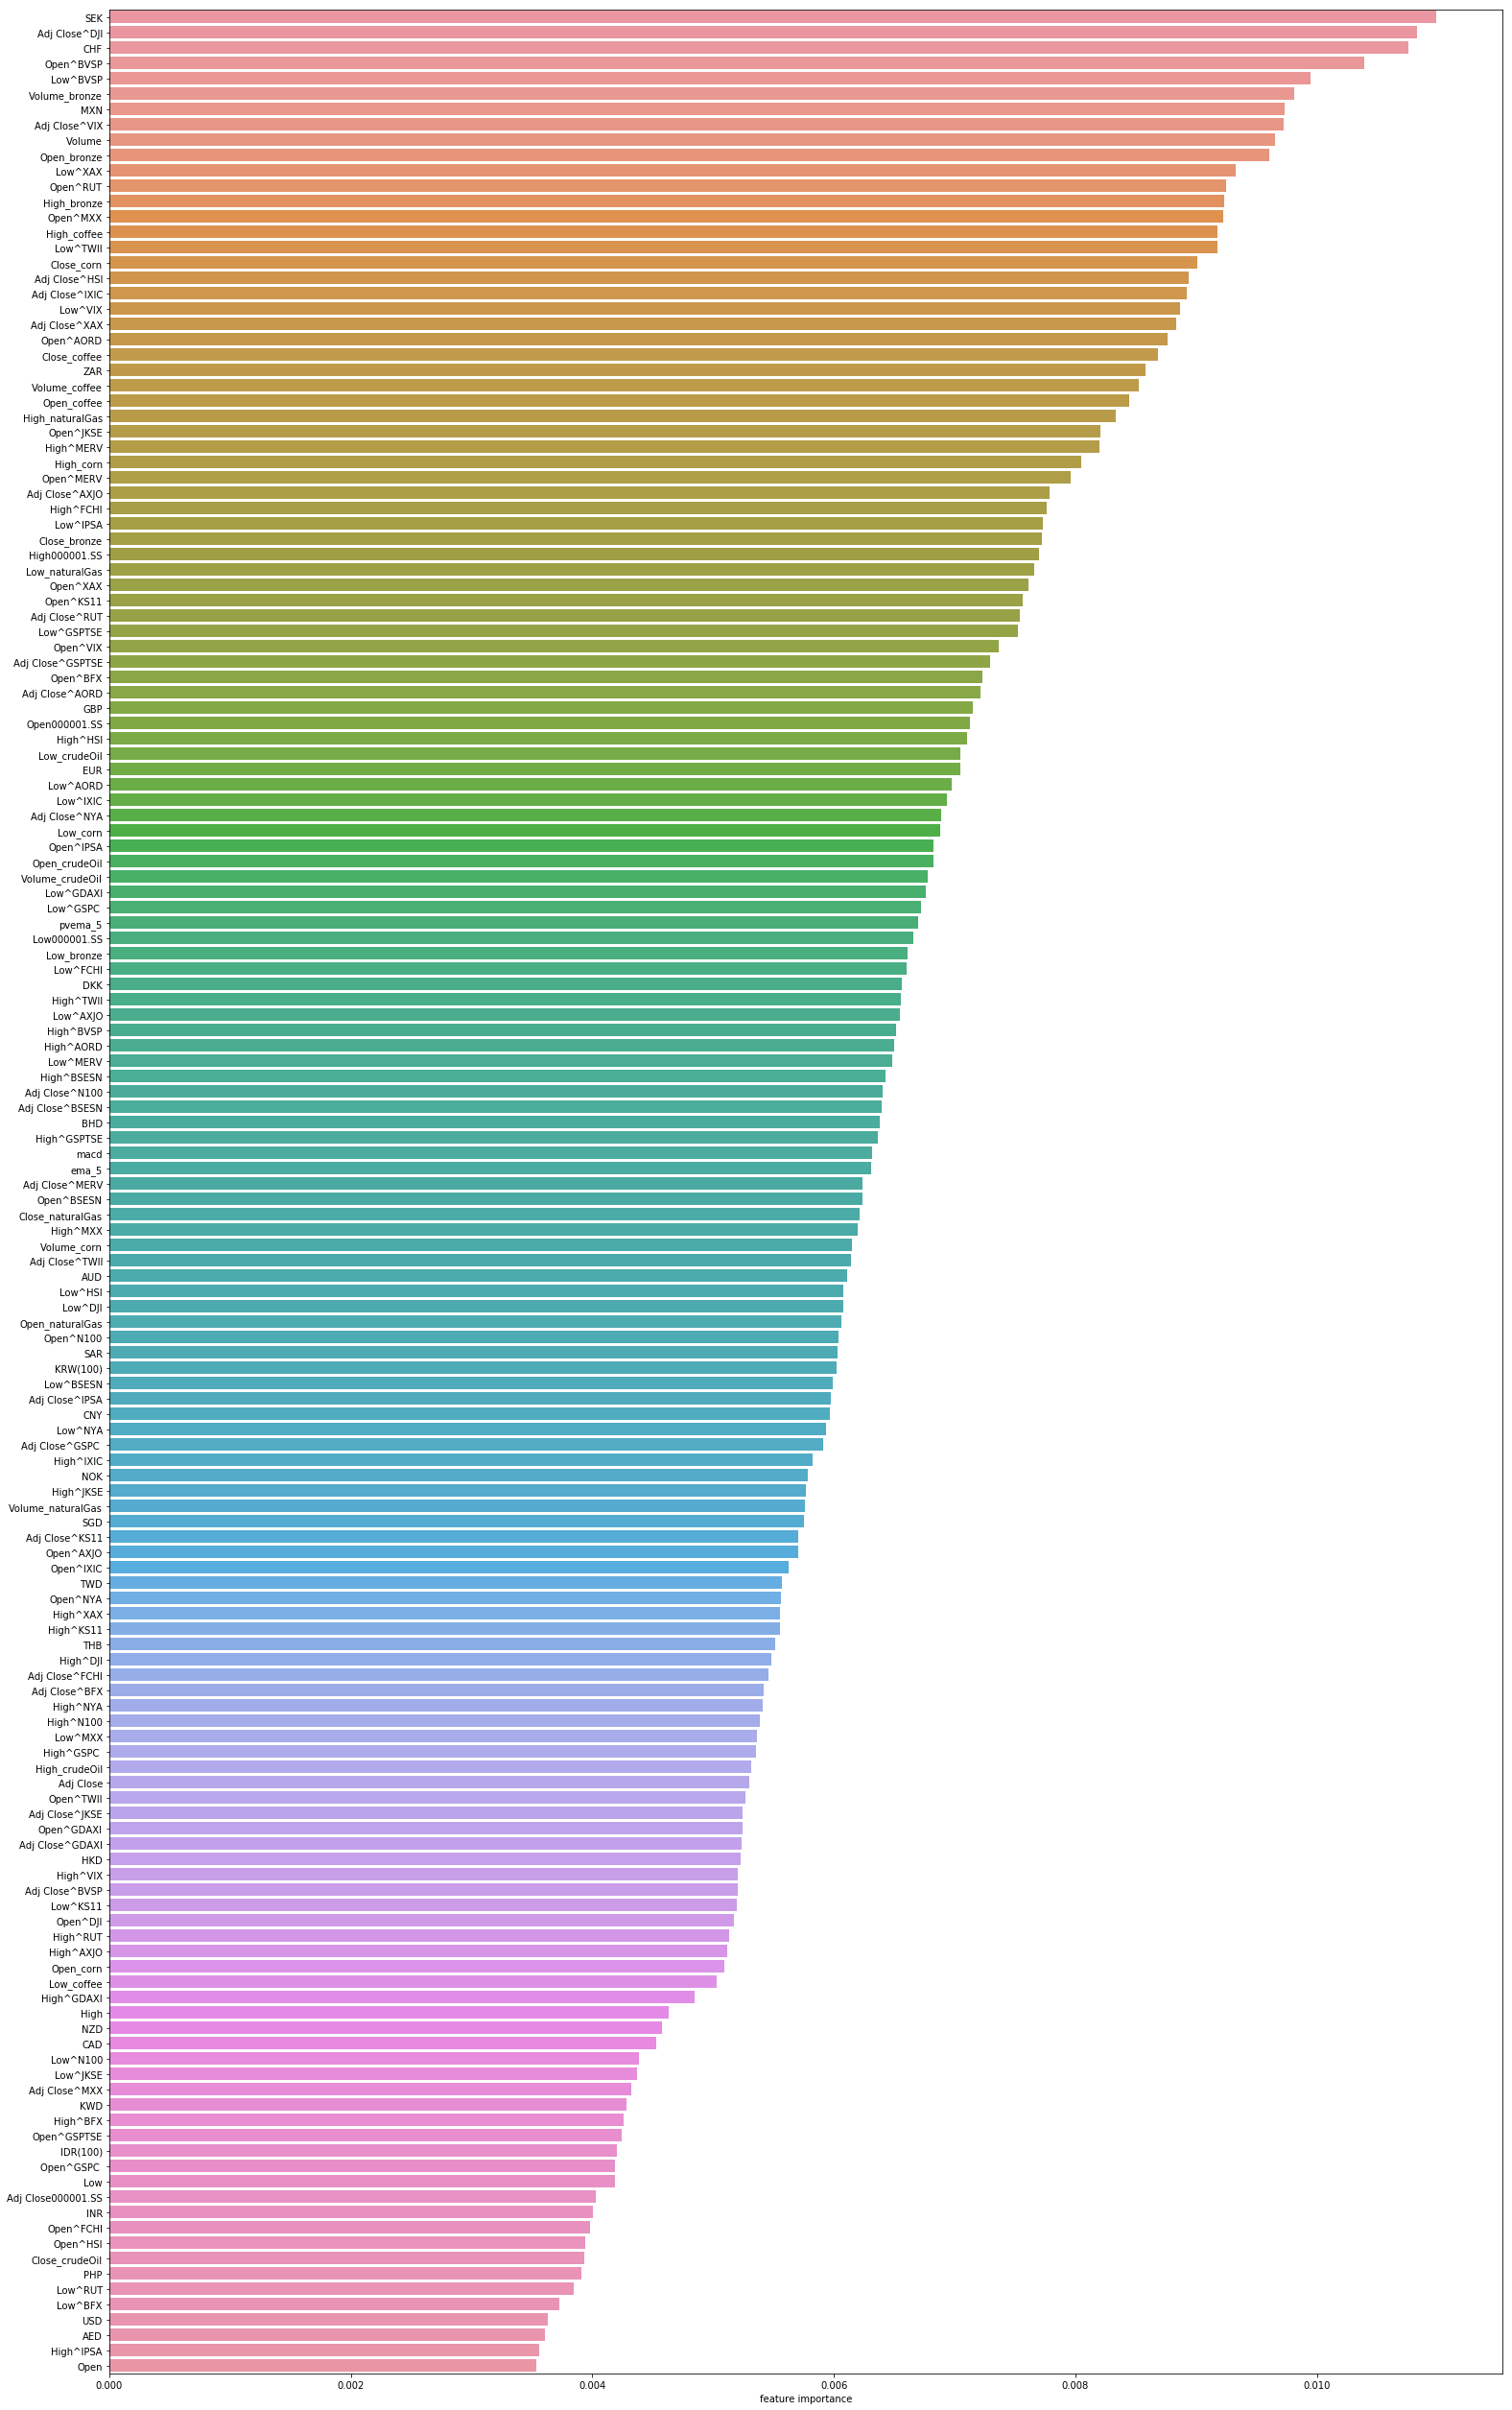

In [7]:
# 特徴量の重要度を確認
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=rf.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [8]:
# LightGBMによる学習
lgbm = lgb.LGBMClassifier(random_state=1)
lgbm.fit(stock_data, answers)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=1,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

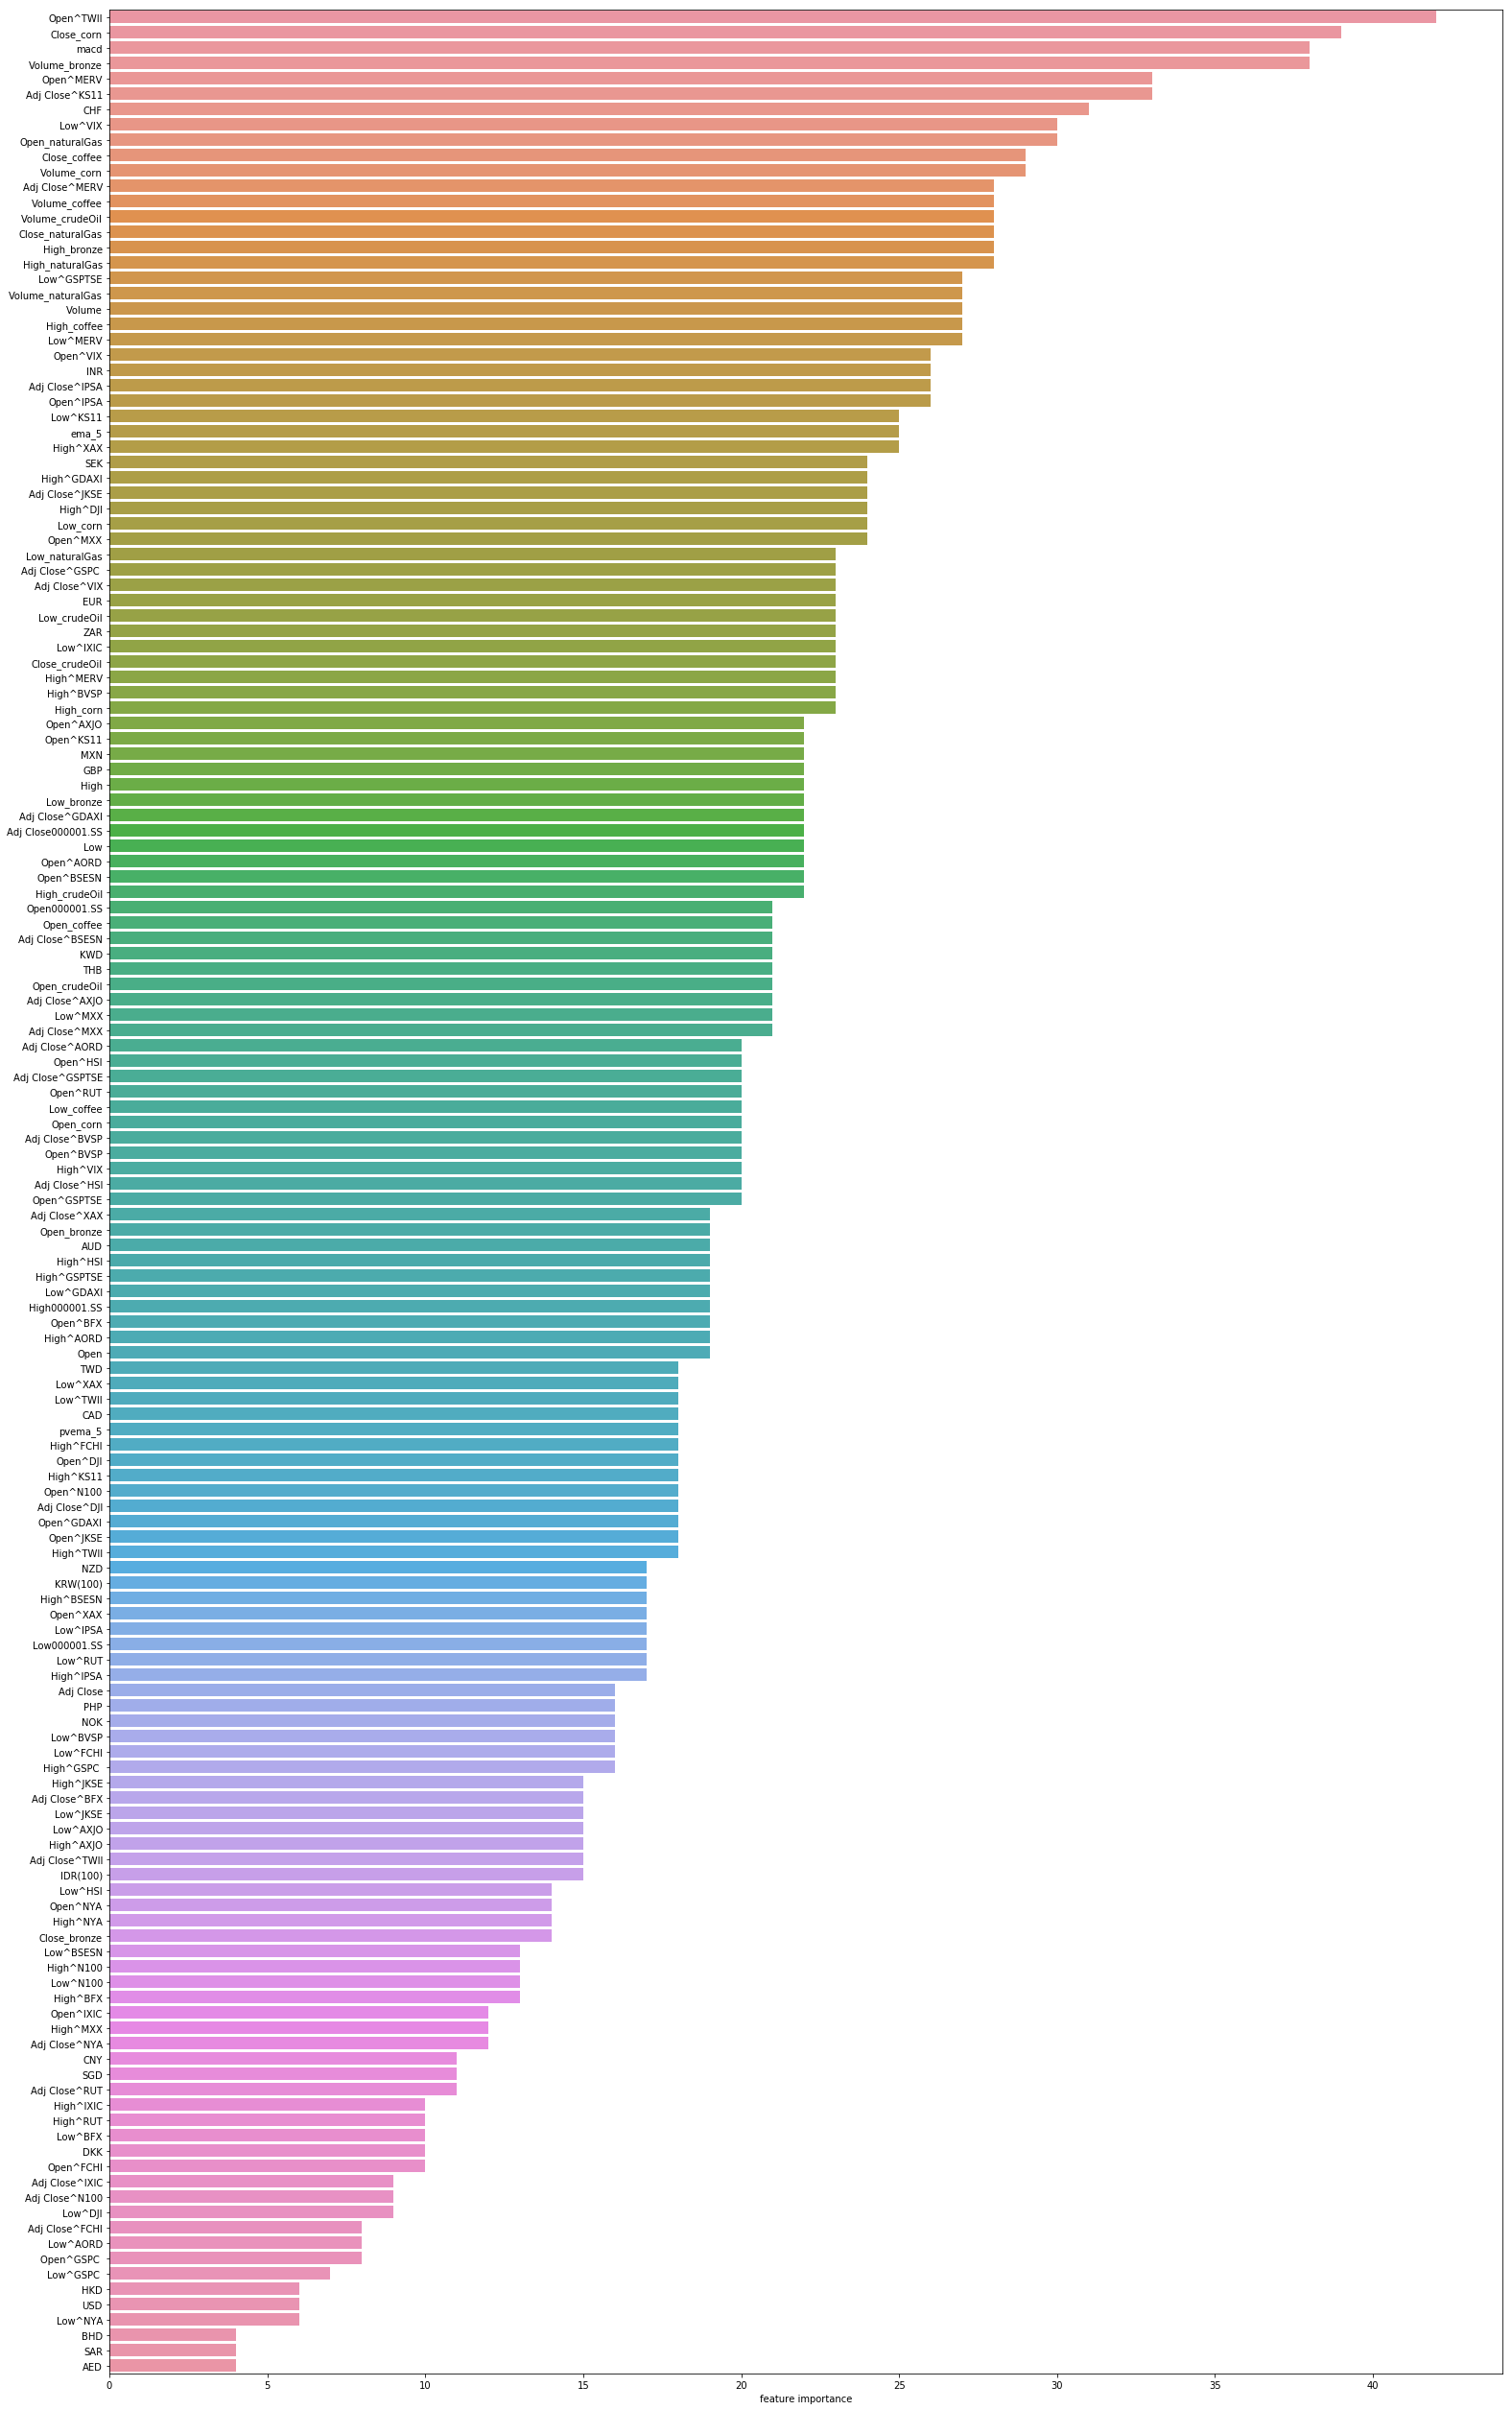

In [9]:
# 特徴量の重要度を確認
ranking = np.argsort(-lgbm.feature_importances_)
f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=lgbm.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [10]:
# XGboostによる学習
xg = xgb.XGBClassifier(random_state=1)
xg.fit(stock_data, answers)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

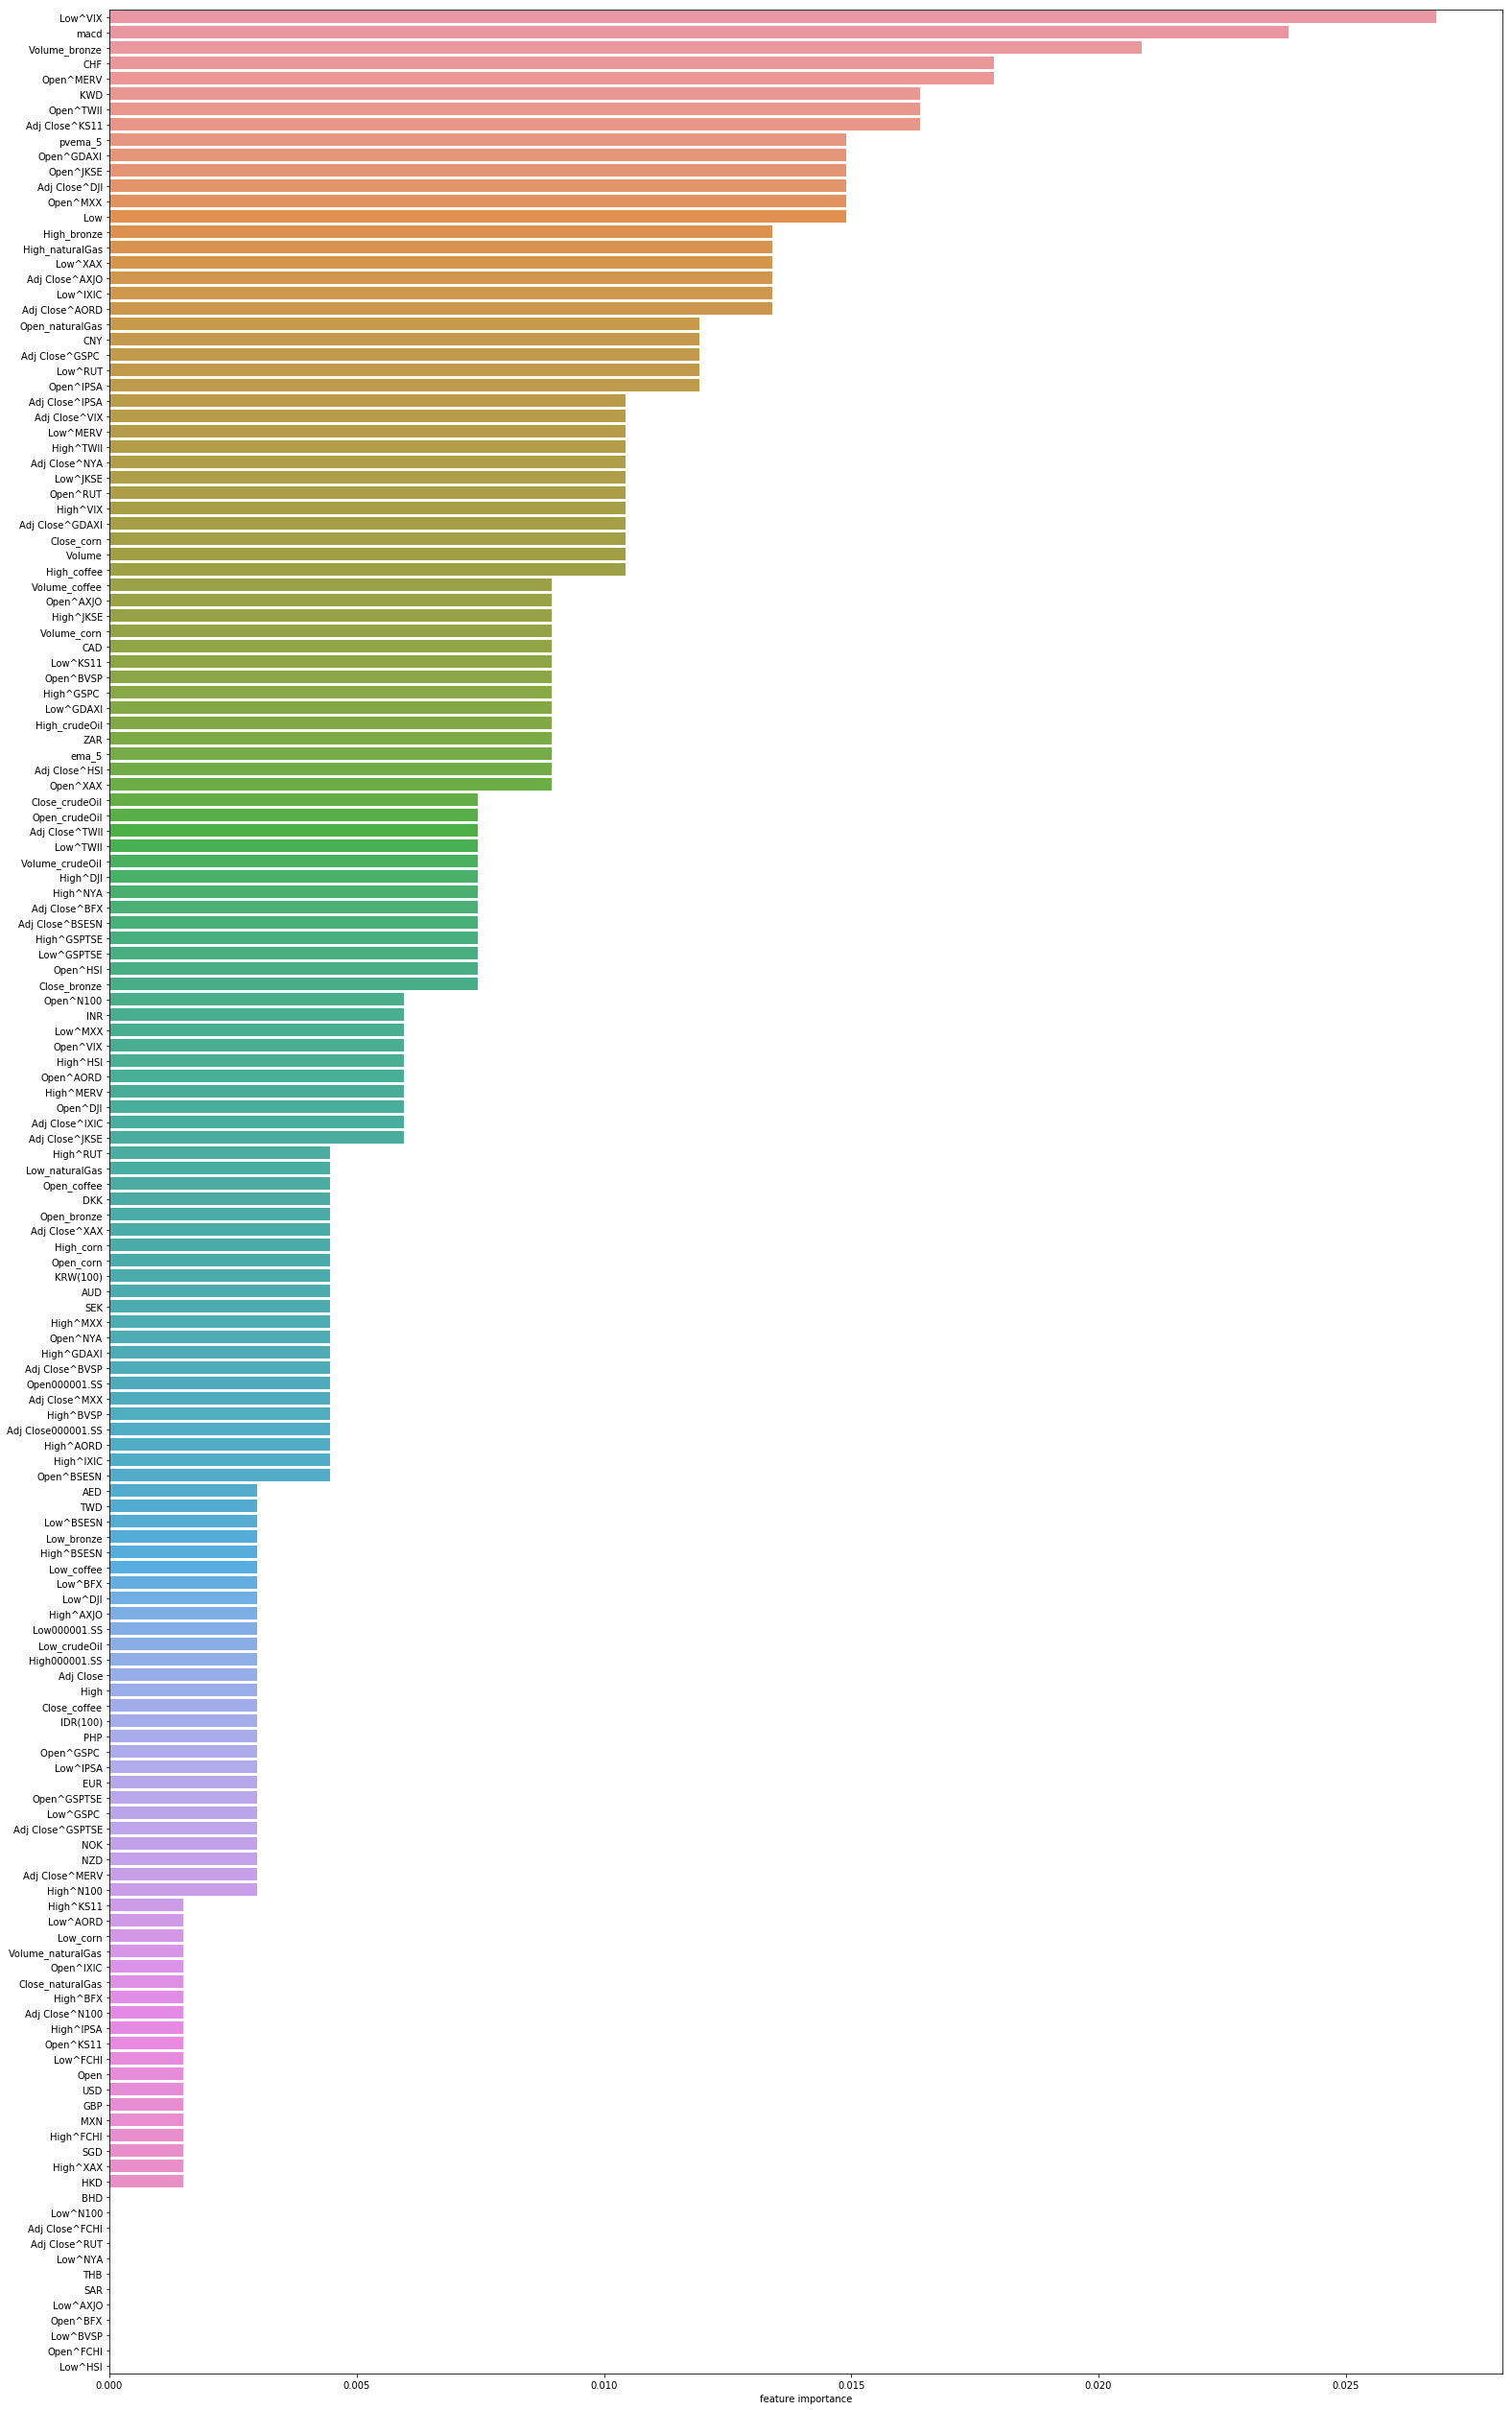

In [11]:
# 特徴量の重要度を確認
ranking = np.argsort(-xg.feature_importances_)

f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=xg.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()